In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pymc

In [9]:
#random water and land values
W, L = 3, 1

#assign a prior on p
p_grid = np.linspace(0,1,100)
#what is our p, let's say we don't know, make it uniform
prior = np.ones(100)
prior2 = np.arange(0,100,1)

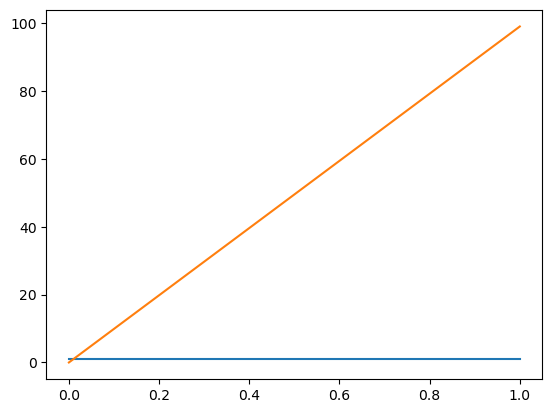

In [10]:
fig, ax = plt.subplots()
_ = ax.plot(p_grid, prior)
_ = ax.plot(p_grid, prior2) 

In [12]:
def dbinom(success: int, size: int, prob: float) -> float:
    fail = size - success
    return (np.math.factorial(size)/
            (np.math.factorial(success)*np.math.factorial(fail))*
            prob**success*(1-prob)**(fail))

In [13]:
dbinom(3, size=3+1, prob=0.2)

0.025600000000000008

In [14]:
dbinom(5, size=6+2, prob=0.2)

0.009175040000000004

In [15]:
likelihood = dbinom(3, 4, p_grid)
likelihood
#the probability for larger probability has now increased because we could observe water 3 times, but probability 1 is 0 
#because we could observe land at least once

array([0.00000000e+00, 4.08079979e-06, 3.23132718e-05, 1.07932990e-04,
       2.53176151e-04, 4.89279567e-04, 8.36480676e-04, 1.31401753e-03,
       1.94012882e-03, 2.73205382e-03, 3.70603247e-03, 4.87730529e-03,
       6.26011345e-03, 7.86769872e-03, 9.71230351e-03, 1.18051708e-02,
       1.41565443e-02, 1.67756683e-02, 1.96707875e-02, 2.28491476e-02,
       2.63169946e-02, 3.00795753e-02, 3.41411370e-02, 3.85049278e-02,
       4.31731962e-02, 4.81471915e-02, 5.34271634e-02, 5.90123625e-02,
       6.49010399e-02, 7.10904473e-02, 7.75768369e-02, 8.43554618e-02,
       9.14205754e-02, 9.87654321e-02, 1.06382287e-01, 1.14262394e-01,
       1.22396011e-01, 1.30772394e-01, 1.39379800e-01, 1.48205488e-01,
       1.57235715e-01, 1.66455740e-01, 1.75849825e-01, 1.85401228e-01,
       1.95092212e-01, 2.04904037e-01, 2.14816966e-01, 2.24810261e-01,
       2.34862187e-01, 2.44950008e-01, 2.55049987e-01, 2.65137391e-01,
       2.75186486e-01, 2.85170537e-01, 2.95061813e-01, 3.04831581e-01,
      

In [16]:
posterior = likelihood*prior/sum(likelihood*prior)
posterior
#likelihood was flattened because all observation happend once as prior is 1 for all probabilities

array([0.00000000e+00, 2.06136052e-07, 1.63226098e-06, 5.45208823e-06,
       1.27888489e-05, 2.47152919e-05, 4.22536838e-05, 6.63758087e-05,
       9.80029687e-05, 1.38005983e-04, 1.87205190e-04, 2.46370444e-04,
       3.16221117e-04, 3.97426101e-04, 4.90603803e-04, 5.96322150e-04,
       7.15098584e-04, 8.47400068e-04, 9.93643080e-04, 1.15419362e-03,
       1.32936719e-03, 1.51942884e-03, 1.72459311e-03, 1.94502406e-03,
       2.18083529e-03, 2.43208990e-03, 2.69880050e-03, 2.98092924e-03,
       3.27838777e-03, 3.59103726e-03, 3.91868841e-03, 4.26110143e-03,
       4.61798604e-03, 4.98900148e-03, 5.37375653e-03, 5.77180945e-03,
       6.18266805e-03, 6.60578964e-03, 7.04058106e-03, 7.48639865e-03,
       7.94254828e-03, 8.40828535e-03, 8.88281475e-03, 9.36529090e-03,
       9.85481775e-03, 1.03504487e-02, 1.08511869e-02, 1.13559846e-02,
       1.18637440e-02, 1.23733165e-02, 1.28835032e-02, 1.33930547e-02,
       1.39006711e-02, 1.44050019e-02, 1.49046462e-02, 1.53981527e-02,
      

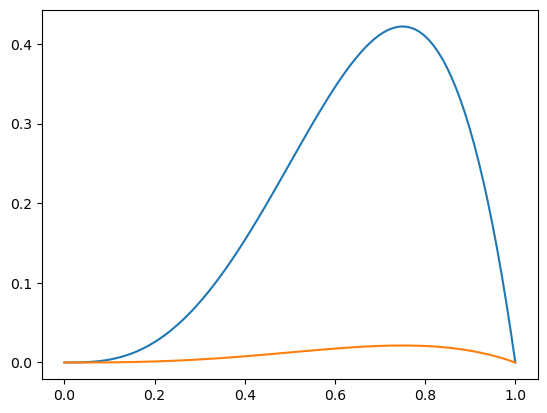

In [19]:
fig, ax = plt.subplots()
_ = ax.plot(p_grid, likelihood)
_ = ax.plot(p_grid, posterior)
#we are more inclined that there is more water than land, since we saw 3 waters out of 4 trials, then 0.8 is more probable 
#than 0.2
#but if you think something is impossible 

In [10]:
likelihood = dbinom(1,2,p_grid)*posterior

In [22]:
obs = np.random.binomial(n=1, p =0.7, size=1000)

In [39]:
sum(obs)

717

In [45]:
posterior_1000 = dbinom(sum(obs),1000,p_grid)*posterior
#then we normalize it
posterior_new = posterior_1000/sum(posterior_1000)

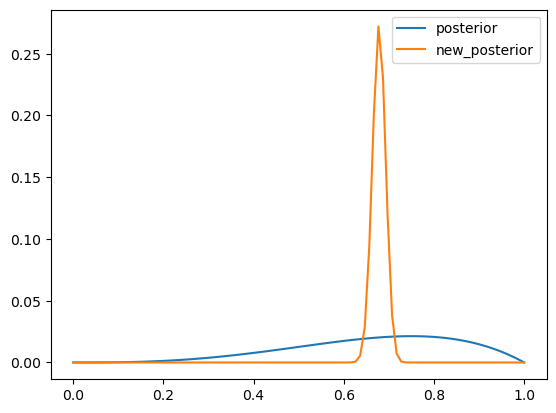

In [27]:
fig, ax = plt.subplots()
_ = ax.plot(p_grid, posterior, label='posterior')
_ = ax.plot(p_grid, posterior_new,label='new_posterior')
ax.legend()


In [51]:
obs = np.random.binomial(n=1, p =0.7, size=1000)
obs_500_1 = np.random.binomial(n=1, p =0.7, size=500)
obs_500_2 = np.random.binomial(n=1, p =0.7, size=500)

In [52]:
posterior_1000 = dbinom(sum(obs),1000,p_grid)*posterior
posterior_1000 = posterior_1000/sum(posterior_1000)

posterior_500_1 = dbinom(sum(obs_500_1),500,p_grid)*posterior
posterior_500_1 = posterior_500_1/sum(posterior_500_1)

posterior_500_2 = dbinom(sum(obs_500_2),500,p_grid)*posterior
posterior_500_2 = posterior_500_2/sum(posterior_500_2)


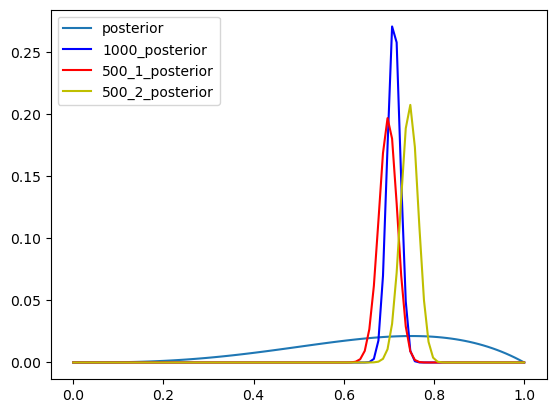

In [53]:
fig, ax = plt.subplots()
_ = ax.plot(p_grid, posterior, label='posterior')
_ = ax.plot(p_grid, posterior_1000,'b',label='1000_posterior')
_ = ax.plot(p_grid, posterior_500_1,'r',label='500_1_posterior')
_ = ax.plot(p_grid, posterior_500_2,'y',label='500_2_posterior')
ax.legend()


In [ ]:
mu_grid= np.array([130,150,160,140,170,180,190,175])
mu_prior= np.array([1,2,3,3,2,1])
mu_prior= mu_prior/sum(mu_prior)

In [ ]:
sigma_grid= np.linspace(0,10,100)
sigma_prior=np.ones(100)/100

In [22]:
obs = np.array([168,158,170,169,157,155,174,174])

In [18]:
with pymc.Model():
    mu = pymc.Uniform('mu',130,190)
    #as if mean was in the middle between 130,190
    sigma = pymc.Uniform('sigma',0,10)
    #I started with sigma uniform, meaning that the deviation is the same on rigth and left of the mean
    height = pymc.Normal('height',mu=mu, sigma=sigma,observed=obs)
    trace = pymc.sample()
    #it gives 4 curves and takes their mean

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 771 seconds.


In [ ]:
#it used Monte Carlo library to through random numbers (the area of the circle, where you calculate how many inside the 
#circle and how many are outside) here you use it to calculate the gaussian

array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

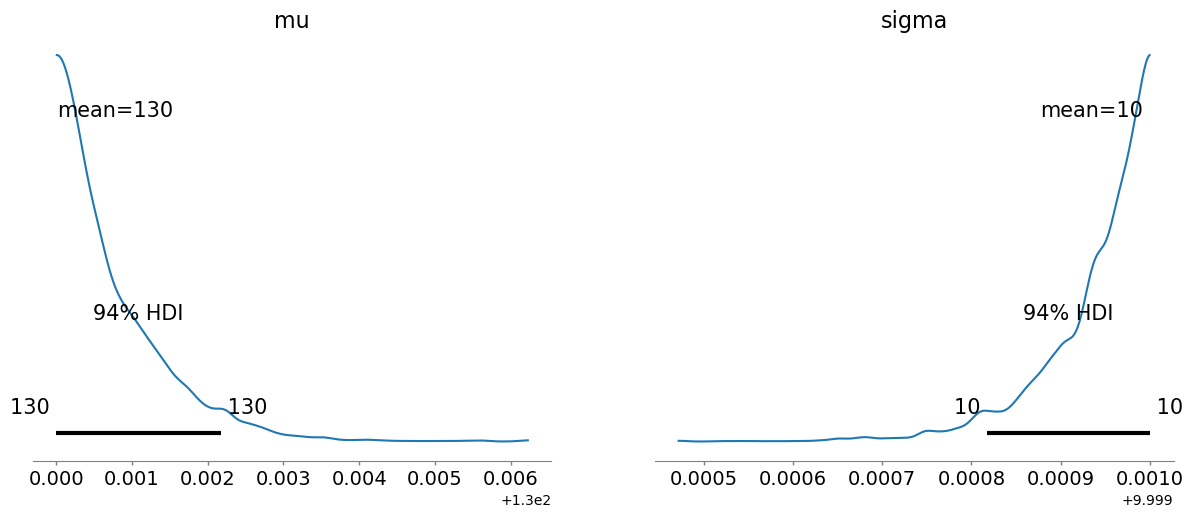

In [21]:
#pymc.plot_posterior(trace,hdi_prob1` =99%)
pymc.plot_posterior(trace)

In [ ]:
import arviz as az